# Windowed functions

A window function is a mathematical function that applies a weighting to each discrete time series sample in a finite set. It should be noted that window functions can be applied in the frequency-domain, though this is a somewhat convoluted process and beyond the scope of this article. As a simple example, assume the finite set x of length N. If each value within x is assigned a weighting of 1 then it can be said that a new set y has been created to which the rectangular window function w (also of length N) has been applied:

$y(n) = x(n) . w(n)\qquad0 \leq n \leq N$

The above equation essentially states that a new set should be created whereby each value at index n is the product of the values at the nth index of the sample set x and window function w. Figure 1 depicts both an unmodified sine wave and a sine wave to which a rectangular window has been applied – they are analogous to each othe

Windowed-sinc filters are used to separate one band of frequencies from another. They are very stable and can be pushed to incredible performance levels. These exceptional frequency domain characteristics are obtained at the expense of poor performance in the time domain including excessive ripple and overshoot in the step response. When carried out by standard convolution, windowed-sinc filters are easy to program, but slow to execute. 

--- 



However, many times, the measured signal isn’t an integer number of periods. Therefore, the
finiteness of the measured signal may result in a truncated waveform with different
characteristics from the original continuous-time signal and the finiteness can introduce sharp
transition changes into the measured signal. The sharp transitions are discontinuities.
When the number of periods in the acquisition is not an integer, the endpoints are
discontinuous. These artificial discontinuities show up in the FFT as high-frequency
components not present in the original signal. These frequencies can be much higher than the
Nyquist frequency and are aliased between 0 and half of your sampling rate. The spectrum you
get by using a FFT, therefore, is not the actual spectrum of the original signal, but a smeared
version. It appears as if energy at one frequency leaks into other frequencies. This
phenomenon is known as spectral leakage, which causes the fine spectral lines to spread into
wider signals.


When you use the FFT to measure the frequency component of a signal then you are basing the
analysis on a finite set of data. The actual FFT transform assumes that it is a finite data set, a
continuous spectrum that is one period of a periodic signal. For the FFT, both the time domain
and the frequency domain are circular topologies, so the two endpoints of the time waveform
are interpreted as though they were connected together. When the measured signal is periodic
and an integer number of periods fill the acquisition time interval, the FFT turns out fine as it
matches this assumption


**Application**
- One of the prime application  of window functions is to mitigate against spectral leakage during transform functions such as FFT . The Fourier transform assumes that the signal to be transformed is periodic over its length by default . Any disparity between the last sample in the set and the repeated first sample will lead to anomalies such as rogue frequency components that are not present in the input signal wich are  being introduced into the resulting spectrum. By reducing the magnitude of samples towards the edges of the input set, the resulting frequency components are lower in magnitude, thus, the amount of error is reduced.

- Window functions are also integral components of Finite Impulse Response (FIR) filters in that they can be used to directly control the level of attenuation which can be achieved . For example, a rectangular window provides a maximum level of attenuation in the stopband of 21 decibels (dB) whereas a Hamming window can result in attenuation levels approaching 53 dB.

- These window functions are useful for noise measurements where better frequency resolution than some of the other windows is wanted but moderate side lobes do not present a problem.



###### Python program to illustrate the utilization and application of window functions 


This program wil teach us how to programmatically generate a sample sine wave and then utilize  either a rectangular , Hamming window .  then apply the window to the generated signal and visualise the output which it will generate .

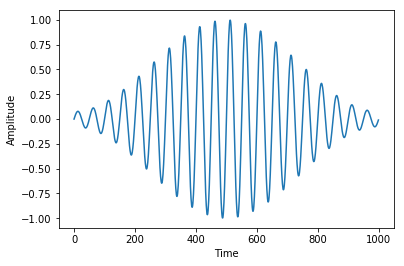

In [4]:
import matplotlib.pyplot as plt
import numpy as np


# Define window type variables for clarity
RECTANGULAR = 'rectangular'
HAMMING = 'hamming'



# The function which will get us the Required sine wave
'''  
Return array of data of length num_samples that represents a sine wave
Total length of data
Total number of peaks in data
Array of floats containing data that represents a sine wave  '''
def get_sine_wave(num_samples, num_peaks):
    sample_points = np.arange(num_samples)
    signal = np.sin(2 * np.pi * num_peaks * sample_points / num_samples)
    return signal


 """
This function will  Return an array containing window coefficients for a given type of window function at a
specified length
    """

def get_window(type, length):  
    window = list()
    # Mathematical formula to generate Rectangular  window 
    if type == RECTANGULAR:
        for i in range(0, length):
            window.append(1)
            
     # Mathematical formula to generate HAMMING  window 
    elif type == HAMMING:
        a = 0.53836
        b = 0.46164

        for i in range(0, length):
            window.append(a - b * np.cos(
                (2 * np.pi * i)/(length - 1)))

    return window


def apply_window(signal, window):
   
    windowed = list()
    for idx, sample in enumerate(signal):
        windowed.append(sample * window[idx])
    return windowed


if __name__ == '__main__':
    signal = get_sine_wave(1000, 20)
    window = get_window(HAMMING, len(signal))
    windowed_signal = apply_window(signal, window)

    plt.plot(windowed_signal)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

#### Types of Windowed Functions used 




So now we know that we can make use of winodow function to realise lot of applications . Selecting a window function is not a simple task. Each window function has its own characteristics and suitability for different applications. To choose a window function, you must estimate the frequency content of the signal.

- If the signal contains strong interfering frequency components distant from the frequency of interest, choose a smoothing window with a high side lobe roll-off rate.
- If the signal contains strong interfering signals near the frequency of interest, choose a window function with a low maximum side lobe level.
- If the frequency of interest contains two or more signals very near to each other, spectral resolution is important. In this case, it is best to choose a smoothing window with a very narrow main lobe.
- If the amplitude accuracy of a single frequency component is more important than the exact location of the component in a given frequency bin, choose a window with a wide main lobe.
- If the signal spectrum is rather flat or broadband in frequency content, use the uniform window, or no window.
- In general, the Hanning (Hann) window is satisfactory in 95 percent of cases. It has good frequency resolution and reduced spectral leakage. If you do not know the nature of the signal but you want to apply a smoothing window, start with the Hann window.




The Hamming and Hann window functions both have a sinusoidal shape. Both windows
result in a wide peak but low side lobes. However, the Hann window touches zero at both
ends eliminating all discontinuity. The Hamming window doesn’t quite reach zero and thus
still has a slight discontinuity in the signal. Because of this difference, the Hamming window
does a better job of cancelling the nearest side lobe but a poorer job of canceling any others.

---

###### Python code to illustrate Different kinds of window Functions used and its frequency responses 

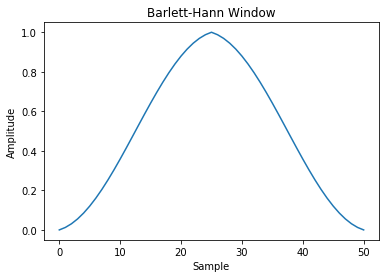

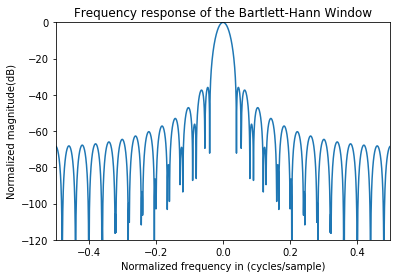

In [1]:
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


window = signal.barthann(51)
plt.plot(window)
plt.title("Barlett-Hann Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Bartlett-Hann Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


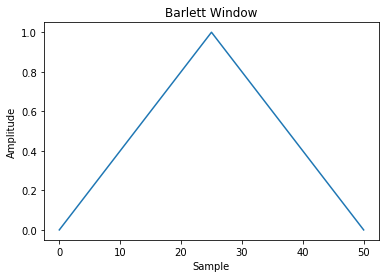

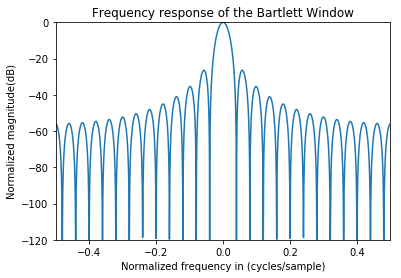

In [2]:
## varrlet Window

from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


window = signal.bartlett(51)
plt.plot(window)
plt.title("Barlett Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Bartlett Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


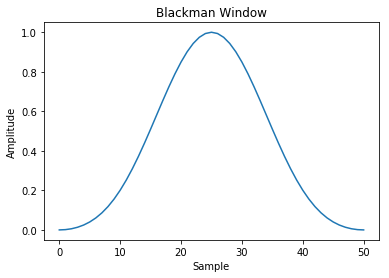

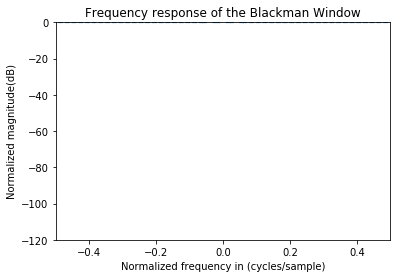

In [8]:
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


window = signal.blackman(51)
plt.plot(window)
plt.title("Blackman Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Blackman Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


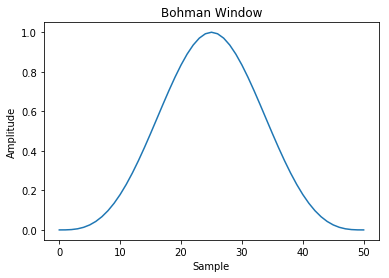

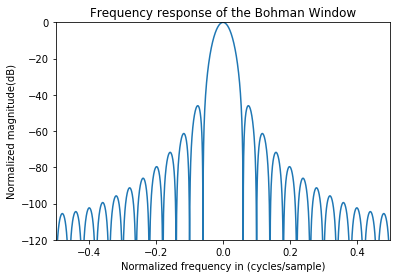

In [7]:
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


window = signal.bohman(51)
plt.plot(window)
plt.title("Bohman Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Bohman Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


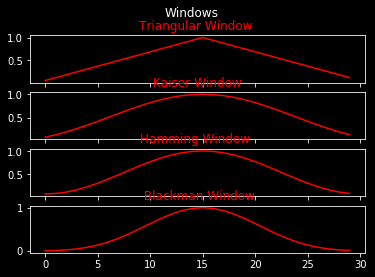

In [9]:
## Get Window 

from matplotlib import pyplot as plt
import mysignals as sigs
from scipy import signal
from matplotlib import style
import numpy as np




triang_window  = signal.get_window('triang',30)
kaiser_window  = signal.get_window(('kaiser',4.0),30)
kaiser_window2  = signal.get_window(4.0,30)
hamm_window    = signal.get_window('hamming',30)
black_window   = signal.get_window('blackman',30)




style.use('dark_background')

f, plt_arr =plt.subplots(4,sharex=True)
f.suptitle('Windows')

plt_arr[0].plot(triang_window,color='red')
plt_arr[0].set_title("Triangular Window ", color ='red')

plt_arr[1].plot(kaiser_window,color='red')
plt_arr[1].set_title(" Kaiser Window ", color ='red')

plt_arr[2].plot(hamm_window,color='red')
plt_arr[2].set_title("Hamming Window ", color ='red')

plt_arr[3].plot(black_window,color='red')
plt_arr[3].set_title(" Blackman Window", color ='red')
plt.show()


##### Bohman window

---
A Bohman window is the convolution of two half-duration cosine lobes. In the time domain, it is the product of a triangular window and a single cycle of a cosine with a term added to set the first derivative to zero at the boundary. Bohman windows fall off as 1/w4.

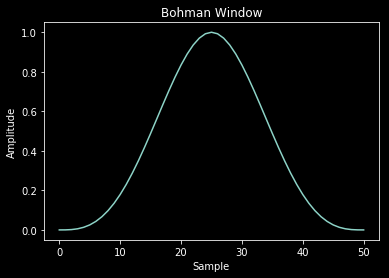

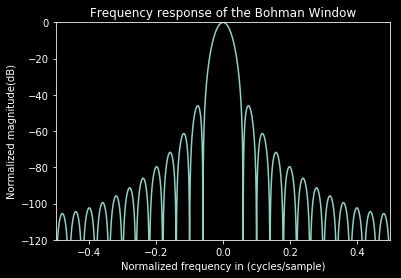

In [10]:
#Python Script for Bohman window 
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


window = signal.bohman(51)
plt.plot(window)
plt.title("Bohman Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Bohman Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


###### Box car window


In mathematics, a boxcar function is any function which is zero over the entire real line except for a single interval where it is equal to a constant, The boxcar function can be expressed in terms of the uniform distribution . As with most such discontinuous functions, there is a question of the value at the transition points. These values are probably best chosen for each individual application.When a boxcar function is selected as the impulse response of a filter, the result is a moving average filter.The function is named after its resemblance to a boxcar, a type of railroad car.

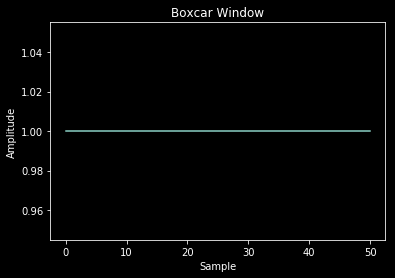

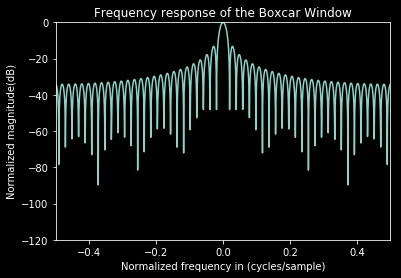

In [11]:
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


window = signal.boxcar(51)
plt.plot(window)
plt.title("Boxcar Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Boxcar Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


##### Chebby window

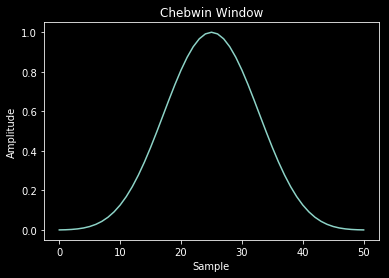

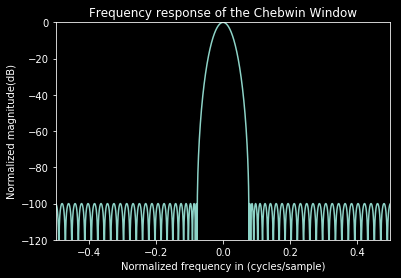

In [12]:
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


window = signal.chebwin(51,at=100)
plt.plot(window)
plt.title("Chebwin Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Chebwin Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


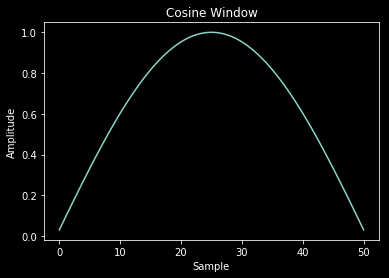

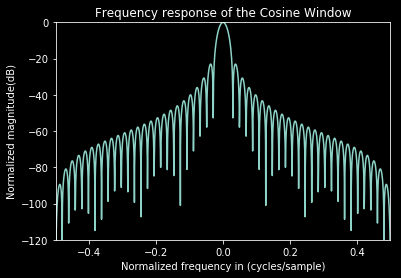

In [13]:
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


window = signal.cosine(51)
plt.plot(window)
plt.title("Cosine Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Cosine Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


##### hamming Window


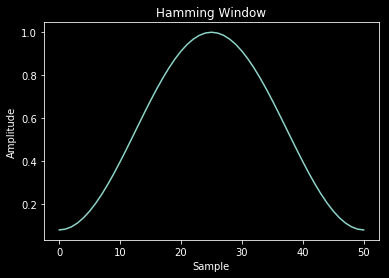

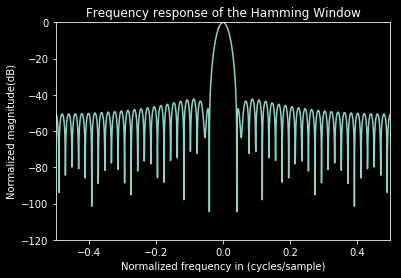

In [14]:
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


window = signal.hamming(51)
plt.plot(window)
plt.title("Hamming Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Hamming Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


##### Hanning Window 

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


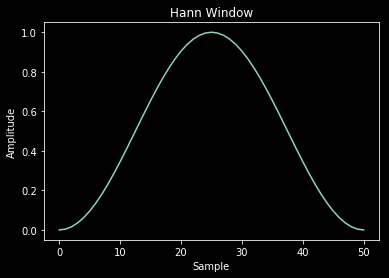

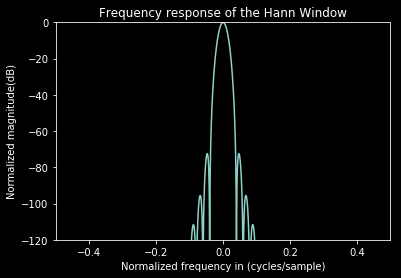

In [16]:
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


window = signal.hann(51)
plt.plot(window)
plt.title("Hann Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Hann Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


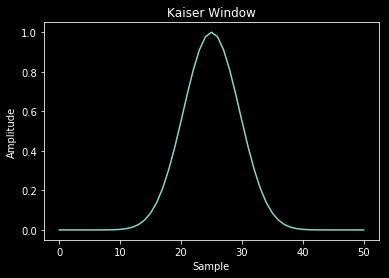

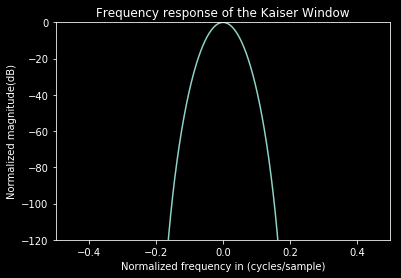

In [17]:
# Kaiser window
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


window = signal.kaiser(51,beta=30)
plt.plot(window)
plt.title("Kaiser Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Kaiser Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


**Nutall Window**


scipy.signal.windows.nuttall(M, sym=True)

This function will Return a minimum 4-term Blackman-Harris window according to Nuttall.
This variation is called “Nuttall4c” by Heinzel
- When True (default), generates a symmetric window, for use in filter design. 
- When False, generates a periodic window, for use in spectral analysis.
This function will return Returns the window array 
The window, with the maximum value normalized to 1 (though the value 1 does not appear if M is even and sym is True).

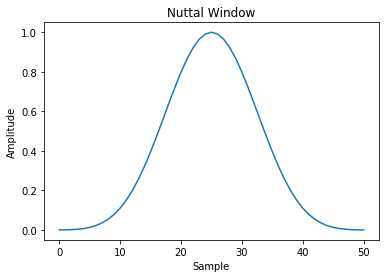

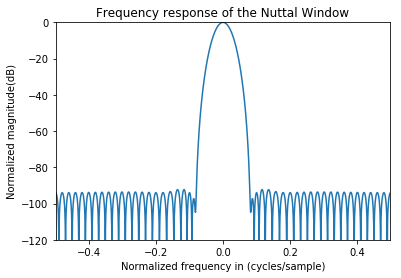

In [1]:
# Nutall window 
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.fftpack import fft, fftshift
import numpy as np


# Here we will be using a window function with 51 points 
window = signal.nuttall(51,sym=True)
plt.plot(window)
plt.title("Nuttal Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()

A = fft(window,2048)/(len(window)/2.0)
freq = np.linspace(-0.5,0.5,len(A))
response = 20*np.log10(np.abs(fftshift(A/abs(A).max())))
plt.plot(freq,response)
plt.axis([-0.5,0.5,-120,0])
plt.title("Frequency response of the Nuttal Window")
plt.ylabel("Normalized magnitude(dB)")
plt.xlabel("Normalized frequency in (cycles/sample)")

plt.show()


Summary of All the contents in this module 


-  Spectral leakage is caused by discontinuities in the original, noninteger number of periods in a signal and can be improved using windowing.
-   Windowing reduces the amplitude of the discontinuities at the boundaries of each finite sequence acquired by the digitizer.
-  No window is often called the uniform or rectangular window because there is still a windowing effect.
-  In general, the Hanning window is satisfactory in 95 percent of cases. It has good frequency resolution and reduced spectral leakage.
-   You should compare the performance of different window functions to find the best one for the application.